**Social Network Analysis**

Dummy examples: we start with symmetric relationships between President and two other speakers. 

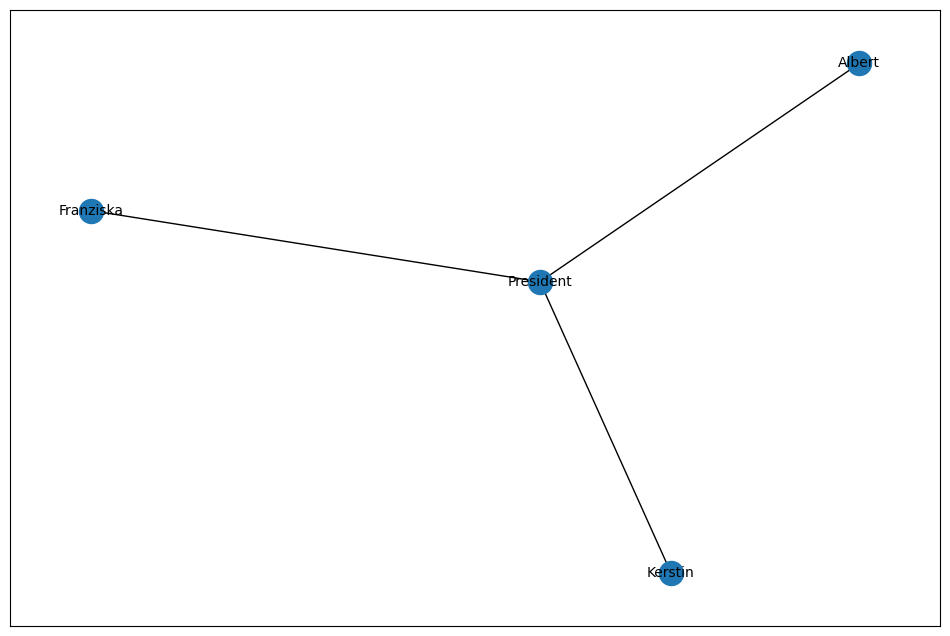

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# create a new graph
G_symmetric = nx.Graph()

# add nodes and edges
G_symmetric.add_edge('President','Albert')
G_symmetric.add_edge('President','Franziska')
G_symmetric.add_edge('President','Kerstin')

# draw the graph
fig = plt.figure(figsize=(12, 8))
nx.draw_networkx(G_symmetric, font_size=10)
plt.show();

**Calculate Centrality**

calculate the degree centrality and betweenness centrality of nodes in the network.

In [3]:
# calculate degree centrality and betweenness for nx
degree_centrality = nx.degree_centrality(G_symmetric)
betweenness_centrality = nx.betweenness_centrality(G_symmetric)

# define the node labels
nodes  = ["President", "Albert", "Franziska", "Kerstin"]

# retrieve degree centrality for each node
dc_calculations = []
bc_calculations = []

for node in nodes:
    dc_calculations += [degree_centrality[node]]
    bc_calculations += [betweenness_centrality[node]]

# create a centrality data df to store values
centrality_data = pd.DataFrame()

# populate the df with the nodes and their centrality values
centrality_data["Node"] = nodes
centrality_data["Degree-Centrality"] = dc_calculations
centrality_data["Betweenness-Centrality"] = bc_calculations

print(centrality_data)

        Node  Degree-Centrality  Betweenness-Centrality
0  President           1.000000                     1.0
1     Albert           0.333333                     0.0
2  Franziska           0.333333                     0.0
3    Kerstin           0.333333                     0.0


**Social Networks for multiple meetings**

Represent the relationships between Billy Corgan and each of these band members. 
In graph theory, this kind of relation is known as symmetric. If President is in a meeting with Albert, Albert is also in a meeting with President.

Create a function that will ingest each list of meeting speakers and return all the possible combinations of the pairs.

In [9]:
# speaker_table per meeting
speaker_table_meeting_one = ['President',
                            'Albert', 
                            'Franziska',
                            'Kerstin',
                            'Darcy Wretzky', 
                            'Melissa Auf der Maur', 
                            'Ginger Pooley', 
                            'Mike Byrne',
                            'Nicole Fiorentino']

speaker_table_meeting_two = ['President', 
                            'Jimmy Chamberlin', 
                            'Paz Lenchantin', 
                            'David Pajo', 
                            'Matt Sweeney']

In [21]:
from itertools import combinations

def get_combinations(input_list):

    """
    Generate all possible combinations of pairs within a list.
    Args:
        input_list (list): The input list.
    Returns:
        list: A list of tuples representing all possible combinations of pairs.
    """

    combinations_list = list(combinations(input_list, 2))
    
    return combinations_list


# combinations_list = [('President', 'Albert'),
#                      ('President', 'Franziska'),
#                      ('President', 'Kesrtin')]

print(get_combinations(speaker_table_meeting_one))

[('President', 'Albert'), ('President', 'Franziska'), ('President', 'Kerstin'), ('President', 'Darcy Wretzky'), ('President', 'Melissa Auf der Maur'), ('President', 'Ginger Pooley'), ('President', 'Mike Byrne'), ('President', 'Nicole Fiorentino'), ('Albert', 'Franziska'), ('Albert', 'Kerstin'), ('Albert', 'Darcy Wretzky'), ('Albert', 'Melissa Auf der Maur'), ('Albert', 'Ginger Pooley'), ('Albert', 'Mike Byrne'), ('Albert', 'Nicole Fiorentino'), ('Franziska', 'Kerstin'), ('Franziska', 'Darcy Wretzky'), ('Franziska', 'Melissa Auf der Maur'), ('Franziska', 'Ginger Pooley'), ('Franziska', 'Mike Byrne'), ('Franziska', 'Nicole Fiorentino'), ('Kerstin', 'Darcy Wretzky'), ('Kerstin', 'Melissa Auf der Maur'), ('Kerstin', 'Ginger Pooley'), ('Kerstin', 'Mike Byrne'), ('Kerstin', 'Nicole Fiorentino'), ('Darcy Wretzky', 'Melissa Auf der Maur'), ('Darcy Wretzky', 'Ginger Pooley'), ('Darcy Wretzky', 'Mike Byrne'), ('Darcy Wretzky', 'Nicole Fiorentino'), ('Melissa Auf der Maur', 'Ginger Pooley'), ('Me

from this output, we make a network:

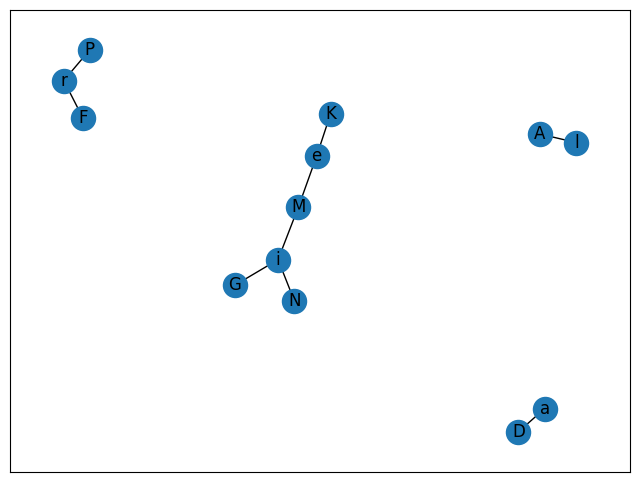

In [23]:
G_symmetric = nx.Graph()
for pair in speaker_table_meeting_one:
    G_symmetric.add_edge(pair[0], pair[1])
    
fig = plt.figure(figsize=(8, 6))
nx.draw_networkx(G_symmetric)
plt.show()

Degree Centrality and Betweenness Centrality with NetworkX

In [27]:
# 1. Use methods in NetworkX to extract centrality measures
betweenness_centrality = nx.betweenness_centrality(G_symmetric)
degree_centrality = nx.degree_centrality(G_symmetric)

# 2. Calculate betweenness, and store values in a dataframe
bc_data = pd.DataFrame.from_dict(betweenness_centrality, 
                                 columns=["BetweennessCentrality"], 
                                 orient="index")

# 3. Calculate betweenness, and store values in a dataframe
dc_data = pd.DataFrame.from_dict(degree_centrality, 
                                 columns=["DegreeCentrality"], 
                                 orient="index")

# 4. Calculate betweenness, and store values in a dataframe
centrality_data = pd.concat([bc_data, dc_data], axis=1)

print(centrality_data)

   BetweennessCentrality  DegreeCentrality
P               0.000000          0.083333
r               0.015152          0.166667
A               0.000000          0.083333
l               0.000000          0.083333
F               0.000000          0.083333
K               0.000000          0.083333
e               0.060606          0.166667
D               0.000000          0.083333
a               0.000000          0.083333
M               0.090909          0.166667
G               0.000000          0.083333
i               0.106061          0.250000
N               0.000000          0.083333
